# Supervised Learning

## 2) Logistic Regression (classification)

### 1-1) Logistic Regression from scratch

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Step 1. Data Creation

## data ( height and weight of  adults and children)

In [2]:
m = 100
1/m 

0.01

In [3]:
adult_height = np.random.normal(175, 5, [m, 1])
adult_weight = np.random.normal(70, 5, [m, 1])

adult_dataset = np.concatenate( (adult_weight, adult_height) , axis = 1)

print(adult_dataset.shape)
print(adult_dataset[:5])

(100, 2)
[[ 66.92898389 183.75875575]
 [ 73.89801784 175.04960375]
 [ 63.45259756 182.89063399]
 [ 72.93674314 177.04685838]
 [ 69.93628773 171.98713775]]


In [4]:
child_height = np.random.normal(120, 5, [m, 1])
child_weight = np.random.normal(30, 5, [m, 1])

child_dataset = np.concatenate( (child_weight, child_height) , axis = 1)

print(child_dataset.shape)
print(child_dataset[:5])

(100, 2)
[[ 35.65890665 124.99415694]
 [ 34.36432389 114.7538898 ]
 [ 35.58727808 126.68585915]
 [ 35.79456967 119.73121613]
 [ 29.39749559 125.06743398]]


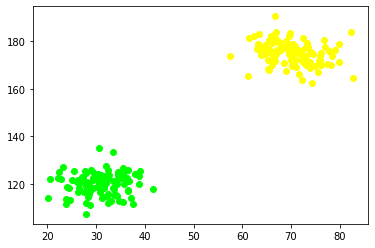

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(adult_dataset[:,0], adult_dataset[:,1], c=np.array([(1, 1, 0)]))
ax1.scatter(child_dataset[:,0], child_dataset[:,1], c=np.array([(0, 1, 0)]))
plt.show()

## Label

In [6]:
adult_label = np.ones( shape=[m, 1] )
child_label = np.zeros( shape=[m, 1] )
label = np.concatenate( (adult_label, child_label) )
print('label의 shape' , label.shape)
print(label[:10])

label의 shape (200, 1)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


## Data + Label

In [7]:
total_dataset = np.concatenate((adult_dataset , child_dataset))
total_dataset = np.concatenate( (total_dataset, label), axis = 1  )

np.random.shuffle(total_dataset) # Shuffle dataset
print(total_dataset[:10])
print(total_dataset.shape)

[[ 68.53233491 170.85729751   1.        ]
 [ 63.45259756 182.89063399   1.        ]
 [ 66.92898389 183.75875575   1.        ]
 [ 73.89801784 175.04960375   1.        ]
 [ 73.91600015 171.1412717    1.        ]
 [ 73.83432778 168.61840253   1.        ]
 [ 74.18416508 175.40467186   1.        ]
 [ 38.73724606 119.95768783   0.        ]
 [ 30.004452   123.77010192   0.        ]
 [ 75.67259641 171.46792946   1.        ]]
(200, 3)


## simple scaling of dataset

In [8]:
weight_mean= total_dataset[:, 0].mean()
height_mean= total_dataset[:, 1].mean()
total_dataset[:, 0] /= weight_mean
total_dataset[:, 1] /= height_mean

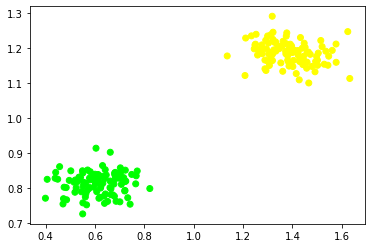

In [9]:
total_dataset.shape

fig = plt.figure()
ax1 = fig.add_subplot(111)
color = [(1*i, 1, 0) for i in total_dataset[:,2] ]
ax1.scatter(total_dataset[:,0], total_dataset[:,1], c = color)
plt.show()

# Step 2. Model definition

In [10]:
def hypothesis(x, w, b):
    pred = np.matmul(x, w.T) + b
    return pred

In [11]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [12]:
def cost(x, w, b, y):
    loss = -y*hypothesis(x, w, b) + np.log(1 + np.exp(hypothesis(x, w, b))) #-y*h(x) + log(1+exp(h(x)))
    cost = (1/m)*np.sum(loss)
    return cost

In [13]:
def derivative(x, w, b, y):
    dw = -(1/m)* np.sum( x*(y - sigmoid(hypothesis(x, w, b))) , axis = 0) # 1 x w_dim
    db = -(1/m)* np.sum( y  - sigmoid(hypothesis(x, w, b)), axis = 0 )
    return dw, db

In [14]:
def update(x, w, b, y, alpha):
    w = w - alpha*(derivative(x, w, b, y)[0]) # w := w + alpha * dw
    b = b - alpha*(derivative(x, w, b, y)[1]) # b := b + alpha * db
    return w, b

# Step 3. Training model

In [15]:
# initialization of weights and bias
w = np.array([[0, 0]])
b = 0

x = total_dataset[:, :2] # x1, x2
y = total_dataset[:, 2:3] # label

## 아래 두 개 cell을 반복하여 실행하며, 선형 분류기의 위치 변화를 관찰해보세요.

In [16]:
def train(_iter, x, w, b, y):
    for i in range(_iter):
        w, b = update(x, w, b, y, alpha=0.01)
    print ('cost =',cost(x, w, b, y))
    print ('w =',w)
    print ('b =',b)
    return w, b

cost = 1.2188520579235047
w = [[0.48287221 0.10419393]]
b = [-0.24869163]


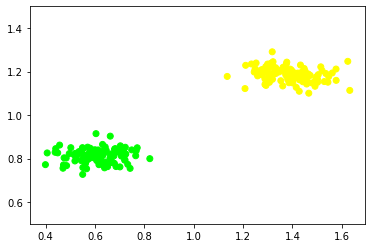

cost = 1.1066712826739638
w = [[0.82075488 0.09615532]]
b = [-0.58114224]


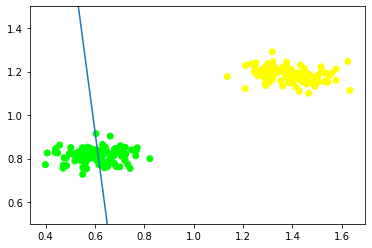

cost = 1.0099553162187658
w = [[1.12955425 0.08519146]]
b = [-0.89471841]


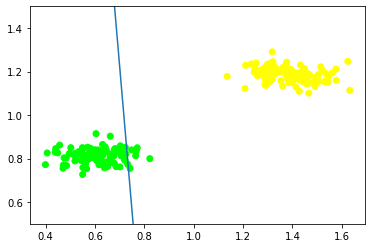

cost = 0.9262517222832993
w = [[1.41670424 0.07619378]]
b = [-1.18659185]


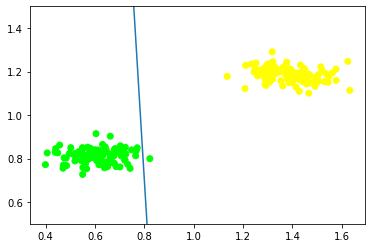

cost = 0.8535245853614853
w = [[1.68440366 0.06907825]]
b = [-1.45864441]


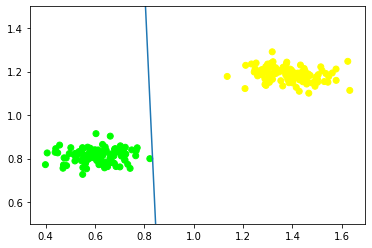

cost = 0.790049207499005
w = [[1.93448112 0.06355554]]
b = [-1.71283723]


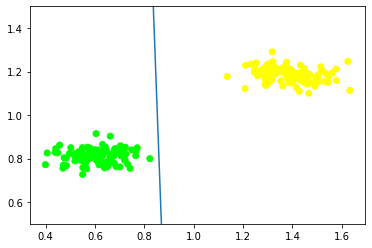

cost = 0.7343808497642086
w = [[2.16861464 0.0593727 ]]
b = [-1.95095505]


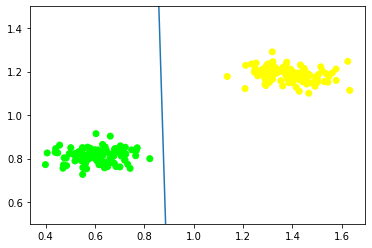

cost = 0.68531717946795
w = [[2.38833056 0.05631898]]
b = [-2.17459447]


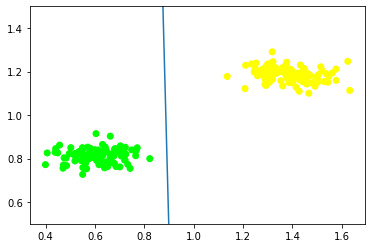

cost = 0.6418605929087252
w = [[2.59500295 0.05421938]]
b = [-2.38517388]


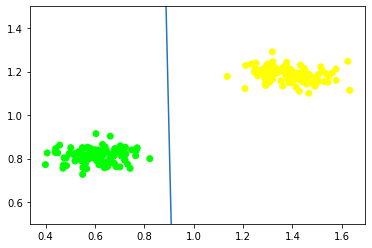

cost = 0.6031837507344356
w = [[2.7898604  0.05292843]]
b = [-2.58394867]


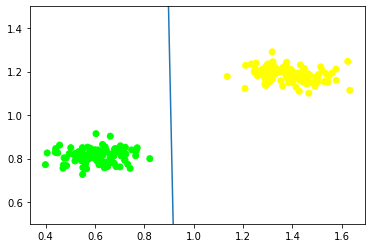

cost = 0.5685996336165638
w = [[2.97399706 0.05232491]]
b = [-2.77202812]


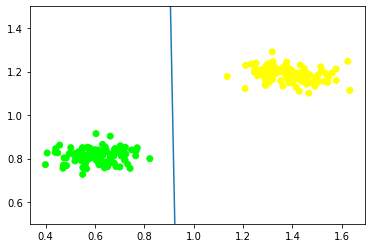

cost = 0.5375363104293951
w = [[3.14838538 0.05230757]]
b = [-2.95039208]


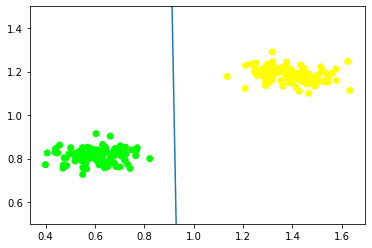

cost = 0.5095160698263598
w = [[3.3138891  0.05279146]]
b = [-3.11990678]


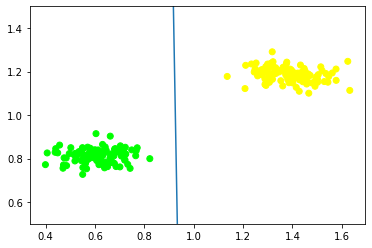

cost = 0.4841383520992886
w = [[3.47127574 0.05370515]]
b = [-3.28133905]


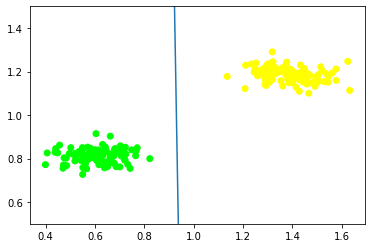

cost = 0.46106587639715474
w = [[3.62122808 0.05498828]]
b = [-3.43536911]


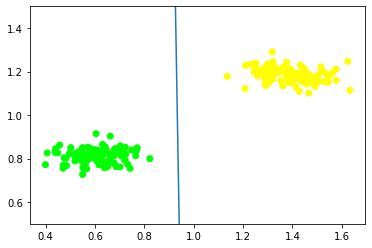

In [17]:
for i in range(15):
    w, b = train(200, x, w, b, y)
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    color = [(1*i, 1, 0) for i in total_dataset[:,2] ]
    ax1.scatter(total_dataset[:,0], total_dataset[:,1], c = color)


    p1 = np.array([0, -b/w[0, 1]])
    p2 = np.array([-b[0]/w[0, 0], 0]) # b has the shape as [1]
    
    coefficients = np.polyfit([p1[0], p2[0]], [p1[1][0], p2[1]], 1)  
    polynomial = np.poly1d(coefficients)
    x_axis = np.linspace(0.5, 1.5)
    y_axis = polynomial(x_axis)
    ax1.set_ylim(0.5, 1.5)
    ax1.plot(x_axis, y_axis)

    plt.show()
